# ⚠️ **Important Disclaimer**

Do **not edit or delete** any of the **Markdown cells** (the ones containing the questions and instructions).

Only write your answers in the **code cells provided below each question**. Try to write each answer in **one code cell** after each question.

# EPA 2021 Vehicle Fuel Economy Dataset Analysis

In this part of the assignment you will explore a comprehensive dataset of 2021 vehicle fuel economy data from the U.S. Environmental Protection Agency (EPA), covering various makes, models, and vehicle configurations.

## Dataset Overview

The dataset includes vehicle specifications, performance metrics, and fuel efficiency data such as:

- `mfr_name`, `division`, `carline` – manufacturer and model information
- `city_mpg`, `hwy_mpg`, `comb_mpg` – fuel efficiency ratings (miles per gallon)
- `engine_displacement`, `no_cylinders` – engine specifications
- `transmission_speed`, `no_gears` – transmission details
- `drive_sys`, `drive_desc` – drivetrain configuration
- `fuel_usage`, `fuel_usage_desc` – fuel type requirements
- `class`, `car_truck` – vehicle classification
- `guzzler` – gas guzzler tax indicator (Y/N)
- `air_aspir_method_desc` – engine aspiration method (naturally aspirated, turbocharged, etc.)


## Q1. Inspect Dataset

Load the packages and the dataset **`epa2021.csv`** into a pandas DataFrame.  
Perform the following tasks:

1. Display the number of **unique values** in the columns `'mfr_name'`, `'class'`, and `'fuel_usage_desc'`.  
2. Print the **number of missing values** for each column in the dataset.

In [4]:
# ANSWER HERE

import pandas as pd

df = pd.read_csv(r"C:\Users\sathiyabama\Documents\assignment_part3\epa2021.csv")


unique_counts = {'mfr_name': df['mfr_name'].nunique(), 'class': df['class'].nunique(), 'fuel_usage_desc': df['fuel_usage_desc'].nunique()}
print("unique_values:", unique_counts)

missing_values = df.isnull().sum()
print("Missing values per column:", missing_values)


unique_values: {'mfr_name': 22, 'class': 22, 'fuel_usage_desc': 6}
Missing values per column: rownames                   0
model_yr                   0
mfr_name                   0
division                   0
carline                    0
mfr_code                   0
model_type_index           0
engine_displacement        0
no_cylinders               0
transmission_speed         0
city_mpg                   0
hwy_mpg                    0
comb_mpg                   0
guzzler                    0
air_aspir_method         439
air_aspir_method_desc      0
transmission               0
transmission_desc          0
no_gears                   0
trans_lockup               0
trans_creeper_gear         0
drive_sys                  0
drive_desc                 0
fuel_usage                 0
fuel_usage_desc            0
class                      0
car_truck                507
release_date               0
fuel_cell                856
dtype: int64


## Q2. Handle Columns with High Missing Values

1. Calculate the **percentage of missing values** for each column in the dataset.  
2. Display only the columns that have missing values greater than 0%.  
3. Identify the columns where more than **40% of the data is missing**.  
4. Drop these high-missing-value columns from the DataFrame.
5. Print the shape of the DataFrame after these steps.

In [7]:
# ANSWER HERE
missing_values_percentage = (df.isnull().sum() / len(df)) * 100

missing_cols = missing_values_percentage[missing_values_percentage > 0]
print("Columns with missing values:", missing_cols)

high_missing_cols = missing_values_percentage[missing_values_percentage > 40].index
print("Columns with >40% missing values:", high_missing_cols.tolist())

df = df.drop(columns=high_missing_cols)

print("Shape of DataFrame:", df.shape)


Columns with missing values: air_aspir_method    39.620939
car_truck           45.758123
fuel_cell           77.256318
dtype: float64
Columns with >40% missing values: ['car_truck', 'fuel_cell']
Shape of DataFrame: (1108, 27)


## Q3. Identify Fuel-Efficient Small Cars

Filter the dataset to select vehicles that meet all of the following criteria:  
- Combined MPG is at least **40**  
- Engine displacement is less than **2.0 liters**  
- Number of cylinders is less than or equal to **4**  

1. Print the total number of such vehicles.  
2. Show their manufacturer name, car line, engine displacement, combined MPG, and number of cylinders. All of them.

In [8]:
# ANSWER HERE
cars = df[(df['comb_mpg'] >= 40) & (df['engine_displacement'] < 2.0) & (df['no_cylinders'] <= 4)]

print("Total number of cars:", cars.shape[0])
cars[['mfr_name', 'carline', 'engine_displacement', 'comb_mpg', 'no_cylinders']]


Total number of cars: 13


,mfr_name,carline,engine_displacement,comb_mpg,no_cylinders
236,Honda,INSIGHT TOURING,1.5,48,4
301,Toyota,COROLLA HYBRID,1.8,52,4
369,Honda,INSIGHT,1.5,52,4
374,Hyundai,Elantra Hybrid,1.6,50,4
375,Hyundai,Elantra Hybrid Blue,1.6,54,4
453,Toyota,PRIUS,1.8,52,4
454,Toyota,PRIUS AWD,1.8,49,4
455,Toyota,PRIUS Eco,1.8,56,4
494,Hyundai,Ioniq,1.6,55,4
495,Hyundai,Ioniq Blue,1.6,59,4


## Q4. Average Engine Displacement by Drive System  

Group the dataset by the `drive_sys` column and calculate the **average engine displacement** for each drive system.  
Sort the results in descending order of average engine displacement and display the top 5 results.

In [9]:
# ANSWER HERE
avg_eng = (df.groupby('drive_sys')['engine_displacement'].mean().sort_values(ascending=False).head(5))
print(avg_eng)


drive_sys
4    3.776111
R    3.751812
P    3.440000
A    3.023464
F    2.125758
Name: engine_displacement, dtype: float64


## Q5. Create Derived Fuel Economy Metrics  

1. Create a new column `fuel_economy_score` as a weighted average of city and highway MPG, where city MPG contributes **30%** and highway MPG contributes **70%**.  
2. Create another column `mpg_zscore` that standardizes the combined MPG (`comb_mpg`) by subtracting the mean and dividing by the standard deviation.  
3. Display the first 10 rows of the DataFrame showing the following columns:  
   - `mfr_name`, `carline`, `city_mpg`, `hwy_mpg`, `comb_mpg`, `fuel_economy_score`, and `mpg_zscore`.

In [10]:
# ANSWER HERE
df['fuel_economy_score'] = (0.3 * df['city_mpg']) + (0.7 * df['hwy_mpg'])

df['mpg_zscore'] = (df['comb_mpg'] - df['comb_mpg'].mean()) / df['comb_mpg'].std()

df[['mfr_name', 'carline', 'city_mpg', 'hwy_mpg','comb_mpg', 'fuel_economy_score', 'mpg_zscore']].head(10)


,mfr_name,carline,city_mpg,hwy_mpg,comb_mpg,fuel_economy_score,mpg_zscore
0,Honda,NSX,21,22,21,21.7,-0.354518
1,aston martin,Vantage Manual,14,21,17,18.9,-0.975065
2,aston martin,Vantage V8,18,24,20,22.2,-0.509655
3,Volkswagen Group of,R8,13,20,16,17.9,-1.130201
4,Volkswagen Group of,R8 2WD,14,23,17,20.3,-0.975065
5,Volkswagen Group of,R8 Spyder,13,20,16,17.9,-1.130201
6,Volkswagen Group of,R8 Spyder 2WD,14,23,17,20.3,-0.975065
7,Volkswagen Group of,TT Roadster quattro,23,31,26,28.6,0.421165
8,BMW,Z4 M40i,22,30,25,27.6,0.266029
9,BMW,Z4 sDrive30i,25,32,28,29.9,0.731438


## Q6. Transmission Type Analysis  

Perform an analysis of vehicle transmissions with respect to fuel efficiency:  

1. Group the dataset by the `transmission` column.  
2. For each transmission type, calculate the following aggregations of `comb_mpg`:  
   - **mean**  
   - **standard deviation**  
   - **count** of vehicles  
3. Round all results to two decimal places.  
5. Do not forget to reset the index so that `transmission` appears as a regular column in the resulting DataFrame. Your final columns (excluding the index) should be exactly as follows:  
   - `transmission`,  `Avg_MPG`, `Std_MPG`, `Count`  
6. Sort the results by the average MPG (**Avg_MPG**) in descending order.  
7. Display the resulting table.
8. Save the final DataFrame to a CSV file named **`transmission_analysis.csv`**.

In [11]:
# ANSWER HERE
grouped_dataset = df.groupby('transmission')

transmission = grouped_dataset['comb_mpg'].agg(Avg_MPG='mean',Std='std',Count= 'count')


transmission_round = transmission.round(2)

transmission_avg=transmission_round.sort_values(by='Avg_MPG', ascending=False)
print(transmission_avg)

transmission_avg.to_csv("transmission_avg.csv", index=False)


              Avg_MPG   Std  Count
transmission                      
CVT             35.58  7.61     45
SCV             31.59  5.86     73
AMS             24.12  9.66    115
M               24.08  5.43     85
SA              22.42  4.15    461
AM              21.69  5.65     32
A               20.35  3.66    297


## Q7. Distribution of Fuel Economy Score  

Create a histogram to visualize the distribution of the fuel economy score that you computed above.  
Use 30 bins and overlay a kernel density estimate (KDE) curve.  
Label the axes appropriately and add a descriptive title to the plot. 

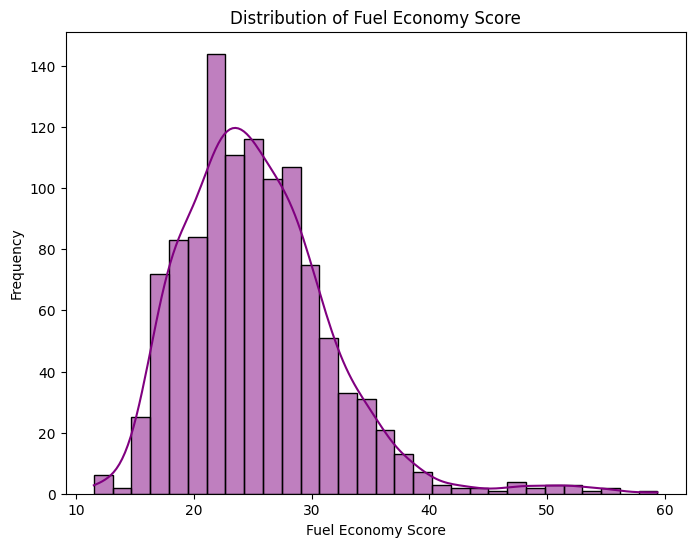

In [12]:
# ANSWER HERE
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(df.fuel_economy_score, bins=30, kde=True, color="purple", edgecolor="black")
plt.xlabel("Fuel Economy Score")
plt.ylabel("Frequency")
plt.title("Distribution of Fuel Economy Score")
plt.show()


## Q8. Average MPG by Engine Displacement Range  

In this task, you will group vehicles into **engine displacement ranges**.  

1. Create a new column `displacement_bin` that categorizes vehicles into the following ranges based on their engine displacement (the category names should be simple Strings):  
   - `0-2L`  
   - `2-4L`  
   - `4-6L`  
   - `6L+`  
2. Group the dataset by this new `displacement_bin` column and calculate the **average combined MPG** for each range.  
3. Create a bar chart showing the average combined MPG per displacement range.  
   - Label the axes appropriately.  
   - Add a descriptive title.

C:\Users\sathiyabama\AppData\Local\Temp\ipykernel_10320\2907554570.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_by_bin = df.groupby('displacement_bin')['comb_mpg'].mean()


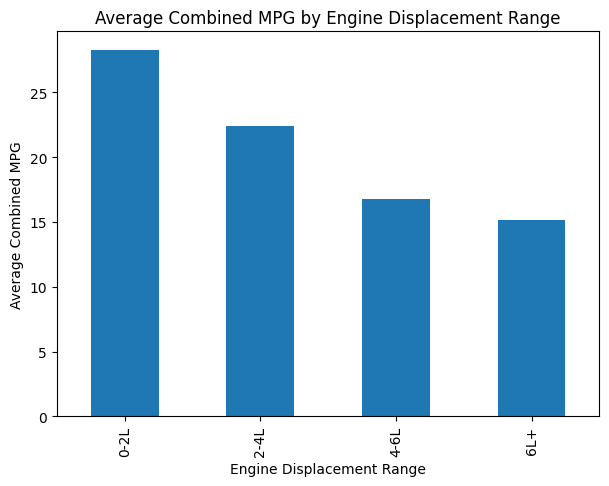

In [20]:
# ANSWER HERE

bins = [0,2,4,6, df['engine_displacement'].max()]
labels = ['0-2L','2-4L','4-6L','6L+']
df['displacement_bin'] = pd.cut(df['engine_displacement'], bins=bins, labels=labels, include_lowest=True)

avg_by_bin = df.groupby('displacement_bin')['comb_mpg'].mean()
avg_by_bin.plot(kind='bar', figsize=(7,5))
plt.title("Average Combined MPG by Engine Displacement Range")
plt.xlabel("Engine Displacement Range")
plt.ylabel("Average Combined MPG")
plt.show()


## Q9. Vehicle Performance Analysis  

Create a scatter plot showing the relationship between **engine displacement** and **combined MPG**.  

- The x-axis represents **engine displacement (Liters)**.  
- The y-axis represents **combined MPG**.
- Color the points by **drive system** (`drive_sys`).  
- Scale point sizes by **number of cylinders** (`no_cylinders`).  
- Add dashed reference lines for the average engine displacement and average combined MPG. Include labels for both lines in the legend.  
- Label the axes and add a descriptive title.  

Also add:
- A legend showing the categories for drive system and cylinders.  
- Gridlines for better readability.

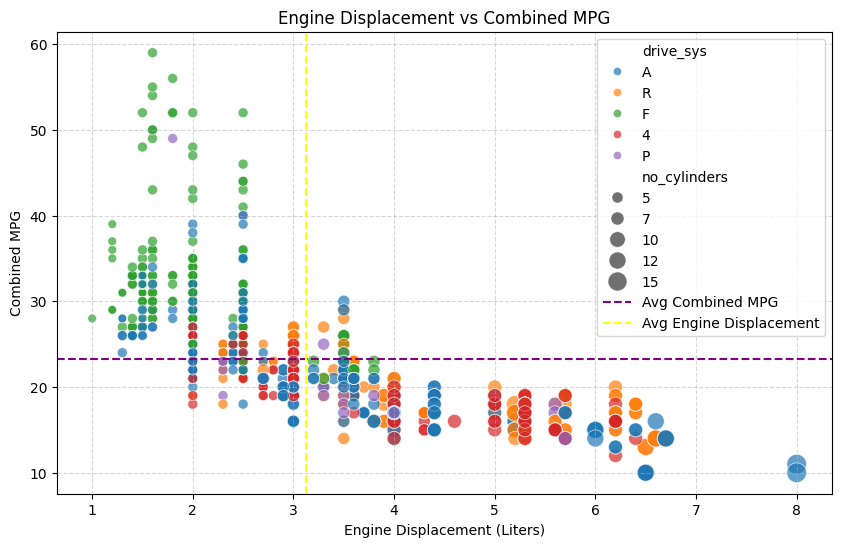

In [14]:
# ANSWER HERE
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='engine_displacement', y='comb_mpg', hue='drive_sys', size='no_cylinders', sizes=(40,200), alpha=0.7)
plt.axhline(df['comb_mpg'].mean(), linestyle='--', color='purple', label='Avg Combined MPG')
plt.axvline(df['engine_displacement'].mean(), linestyle='--', color='yellow', label='Avg Engine Displacement')
plt.title("Engine Displacement vs Combined MPG")
plt.xlabel("Engine Displacement (Liters)")
plt.ylabel("Combined MPG")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Q10. Recreate the Heatmap with Pivot Table 

Your task is to reproduce the following figure as closely as possible.  

**Important:** You **must** use a **pivot table** to solve this problem.

Here are a few helpful hints:  
- The plot was created using **Seaborn's `heatmap()`** function.  
- The color map used is **YlGnBu**.  

Start with a basic heatmap, then refine it by adding/adjusting:  
- annotations  
- ticks  
- labels  
- borders  
- title and axis labels  

**Save your final plot as a PDF file named:**  
`city_mpg_heatmap.pdf`

### Reference Figure

![Reference Heatmap](reference_heatmap.png)

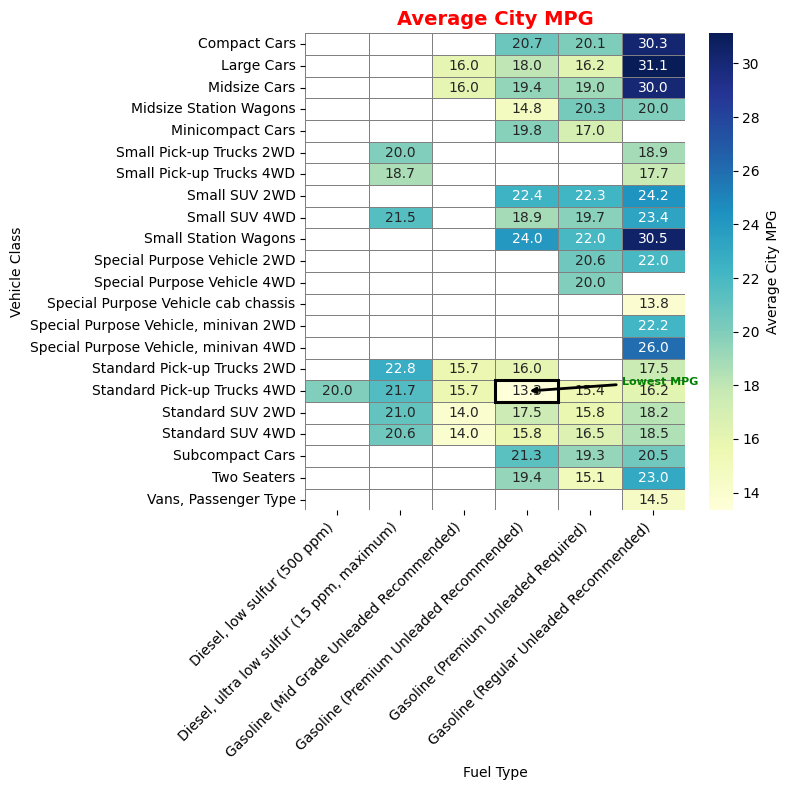

Lowest city MPG: 13.3 in class='Standard Pick-up Trucks 4WD' and fuel='Gasoline (Premium Unleaded Recommended)'


In [17]:
# ANSWER HERE
from matplotlib.patches import Rectangle

pivot_table = pd.pivot_table( df, index='class', columns='fuel_usage_desc', values='city_mpg', aggfunc='mean')

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap( pivot_table, ax=ax, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5, linecolor="gray", cbar_kws={"label": "Average City MPG"})
ax.set_title("Average City MPG", fontsize=14, weight="bold", color="red")
ax.set_xlabel("Fuel Type")
ax.set_ylabel("Vehicle Class")
plt.xticks(rotation=45, ha="right")

min_idx = pivot_table.stack().idxmin()   
min_val = pivot_table.stack().min()
row_name, col_name = min_idx
row_i = pivot_table.index.get_loc(row_name)
col_j = pivot_table.columns.get_loc(col_name)

rect = Rectangle((col_j, row_i), 1, 1, fill=False, edgecolor="black", linewidth=2.2)
ax.add_patch(rect)

cell_x = col_j + 0.5
cell_y = row_i + 0.5
ax.annotate( "Lowest MPG", xy=(cell_x, cell_y), xytext=(cell_x + 1.5, cell_y - 0.3), arrowprops=dict(arrowstyle="->", lw=2, color="black"), fontsize=8,weight="bold", color="green")

plt.tight_layout()
plt.savefig("city_mpg_heatmap.pdf")
plt.show()

print(f"Lowest city MPG: {min_val:.1f} in class='{row_name}' and fuel='{col_name}'")